In [3]:
# Required Imports
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import time
import pandas as pd
import re as re

In [4]:
#request user input for LinkedIn username and password:
print("Please enter the exact LinkedIn username you use to login (email/phone?):")
username_string = str(input()) 
print()
print("Please enter the exact LinkedIn password:")
password_string = str(input())
print()
print("Please enter your usernmae exactly how it appears in your profile link (after '/in') :")
link_username = str(input())
print()
print("Please enter the number of the last posts you want to analyse:")
number_of_posts = int(input())

Please enter the exact LinkedIn username you use to login (email/phone?):
ditirorampate@gmail.com

Please enter the exact LinkedIn password:
fatsula95

Please enter your usernmae exactly how it appears in your profile link (after '/in') :
ditiro-rampate-46a999a4

Please enter the number of the last posts you want to analyse:
5


In [5]:
#create a browser-specific (Google Chrome) web navigation simulator:
browser = webdriver.Chrome("C:/Users/Ditiro/Downloads/chromedriver.exe")

#open the LinkedIn login page and login under a specified account:
browser.get('https://www.linkedin.com/login')
#enter the specified information to login to LinkedIn:
elementID = browser.find_element_by_id('username')
elementID.send_keys(username_string)
elementID = browser.find_element_by_id('password')
elementID.send_keys(password_string)
elementID.submit()
print(username_string)

ditirorampate@gmail.com


In [6]:
#open the recent post activity page of the LinkedIn user you specified:
recent_activity_link = "https://www.linkedin.com/in/" + link_username + "/detail/recent-activity/shares/"
link_username
browser.get(recent_activity_link)

In [7]:

#calculate number of scrolls depending on the input
number_of_scrolls = -(-number_of_posts // 5)  # 5 is LinkedIn's number of posts per scroll

#we need a loop because we have a particular number of scrolls...
likes = []
comments = []
views = []

SCROLL_PAUSE_TIME = 5

# Get scroll height
last_height = browser.execute_script("return document.body.scrollHeight")

for scroll in range(number_of_scrolls) : 
    # Scroll down to bottom
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)
    # Calculate new scroll height and compare with last scroll height
    new_height = browser.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height    

#query the contents (returns service reponse object with web contents, url headers, status and other):
src = browser.page_source
#beautiful soup instance:
soup = bs(src, features="lxml")   #lxml
    
#find LIKES on LinkedIn
#look for "span" tags that have the specific following attribute (click 'inspect' on the L-in page)
#need to convert the list of bs4 tags into strings and then extract 
#find these specific tags ("<stuff>") in the soup contents:

likes_bs4tags = soup.find_all("span", attrs = {"class" : "v-align-middle social-details-social-counts__reactions-count"})
#converts a list of 1 string to int, appends to likes list
for tag in likes_bs4tags:
    strtag = str(tag)
    #the first argument in findall (below) is a regular expression (accounts for commas in the number)
    list_of_matches = re.findall('[,0-9]+',strtag)
    #converts the last element (string) in the list to int, appends to likes list
    last_string = list_of_matches.pop()
    without_comma = last_string.replace(',','')
    likes_int = int(without_comma)
    likes.append(likes_int)
        
#find COMMENTS on LinkedIn
#same concept here
comments_bs4tags = soup.find_all("li", attrs = {"class" : "social-details-social-counts__item social-details-social-counts__comments"})
for tag in comments_bs4tags:
    strtag = str(tag)
    list_of_matches = re.findall('[,0-9]+',strtag)
    last_string = list_of_matches.pop()
    without_comma = last_string.replace(',','')
    comments_int = int(without_comma)
    comments.append(comments_int)
        
#find VIEWS on LinkedIn
#same concept here
views_bs4tags = soup.find_all("span", attrs = {"class" : "icon-and-text-container t-14 t-black--light t-normal"})
for tag in views_bs4tags:
    strtag = str(tag)
    list_of_matches = re.findall('[,0-9]+',strtag)
    last_string = list_of_matches.pop()
    without_comma = last_string.replace(',','')
    views_int = int(without_comma)
    views.append(views_int)  

print(likes) 
print(comments)
print(views)

[6, 18, 29, 2, 15, 1]
[]
[308, 76, 79, 432, 958, 85, 62, 71, 300, 47]


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [9]:
# Reverse the lists
likes.reverse()
comments.reverse()
views.reverse()

# Convert lists into pandas DataFrames
likes_df = pd.DataFrame(likes, columns = ['Likes'])
comments_df = pd.DataFrame(comments, columns =['Comments'])
views_df = pd.DataFrame(views, columns =['Views'])


In [10]:
likes_df

,Likes
0,1
1,15
2,2
3,29
4,18
5,6


In [11]:
views_df

,Views
0,47
1,300
2,71
3,62
4,85
5,958
6,432
7,79
8,76
9,308


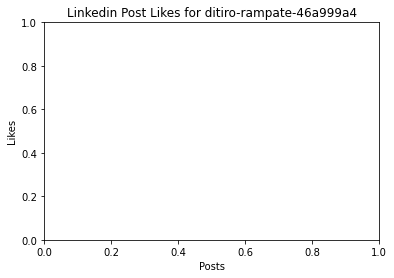

<Figure size 432x288 with 0 Axes>

In [13]:

plt.title('Linkedin Post Likes for ' + link_username)
plt.xlabel('Posts')
plt.ylabel('Likes')
plt.savefig(link_username + '-linkedin-likes-last-' + str(number_of_posts) + '-posts-GRAPH.png', dpi=600)
plt.show()
plt.clf()

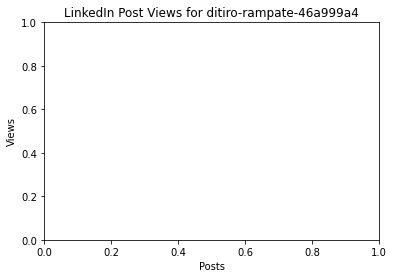

<Figure size 432x288 with 0 Axes>

In [14]:
plt.title('LinkedIn Post Views for ' + link_username)
plt.xlabel('Posts')
plt.ylabel('Views')
plt.savefig(link_username + '-linkedin-views-last-' + str(number_of_posts) + '-posts-GRAPH.png', dpi=600)
plt.show()
plt.clf()

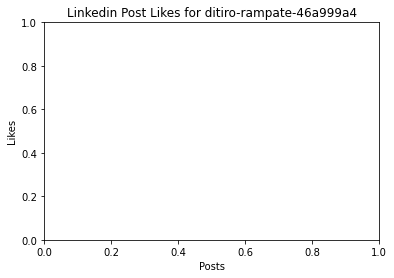

<Figure size 432x288 with 0 Axes>

In [15]:
plt.title('Linkedin Post Likes for ' + link_username)
plt.xlabel('Posts')
plt.ylabel('Likes')
plt.savefig(link_username + '-linkedin-likes-last-' + str(number_of_posts) + '-posts-GRAPH.png', dpi=600)
plt.show()
plt.clf()